In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import calendar

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [3]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


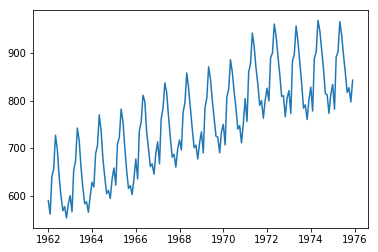

In [4]:
plt.plot(milk)
plt.show()

In [5]:
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221297,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [6]:
milk_per_day = zip(milk.index.days_in_month, milk.milk)
milk["daily"] = map(lambda x: x[1]*1./x[0]*1., milk_per_day)

In [7]:
milk.head()

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


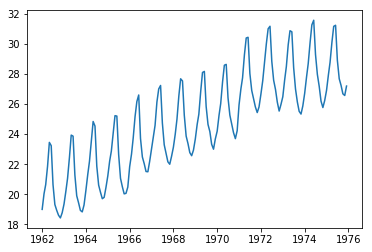

In [8]:
plt.plot(milk.daily)
plt.show()

In [47]:
np.mean(milk.daily)
sum(milk.daily)

4166.326661899464

In [11]:
milk["daily_diff1"] = milk.daily - milk.daily.shift(1)
milk["daily_diff12"] = milk.daily - milk.daily.shift(12)
milk["daily_diff12_1"] = milk.daily_diff12 - milk.daily_diff12.shift(1)


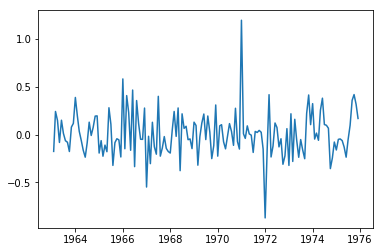

In [12]:
plt.plot(milk.daily_diff12_1.dropna())
plt.show()

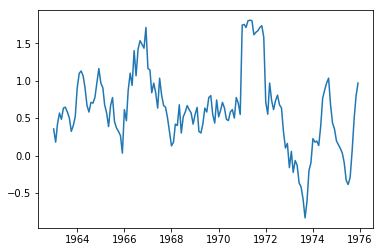

In [13]:
plt.plot(milk.daily_diff12.dropna())
plt.show()

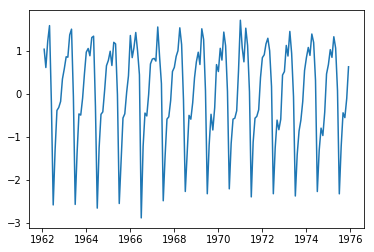

In [14]:
plt.plot(milk.daily_diff1.dropna())
plt.show()

In [65]:
milk["daily_diff1_1"] = milk.daily_diff1.dropna() - milk.daily_diff1.dropna().shift(1)

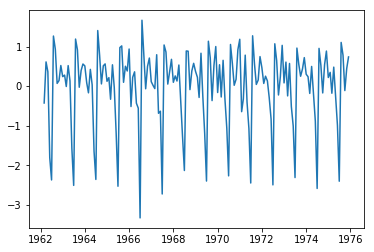

In [66]:
plt.plot(milk.daily_diff1_1.dropna())
plt.show()

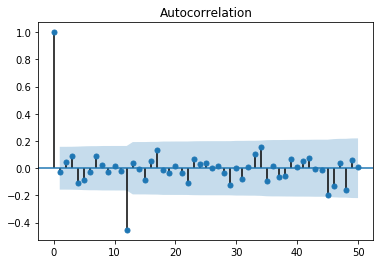

In [15]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50)

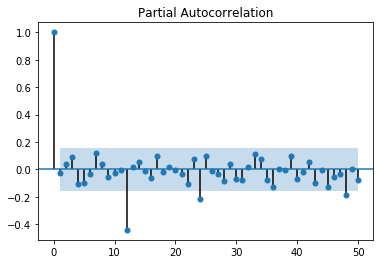

In [17]:
sm.graphics.tsa.plot_pacf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50)